In [1]:
!ls ../airflow/plugins/utils/

db.py  __pycache__  strategy.py  tinkoff.py


In [2]:
import sys
sys.path.insert(0, '../airflow/plugins/utils/')

In [3]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [4]:
def _get_db_url(connector: str) -> str:
    return 'user=trader password=income host=localhost port=5432 dbname=stocks'

In [5]:
db._get_db_url = _get_db_url

In [6]:
data = db.get_data_from_table('adsdf', 'aapl')

In [7]:
data.head()

,time,open,high,low,close,volume
0,2020-02-18 07:00:00,80.51,80.76,77.60,79.75,38141376
1,2020-02-19 07:00:00,80.01,81.14,79.67,80.91,28958280
2,2020-02-20 07:00:00,81.21,81.25,79.50,80.08,25971548
3,2020-02-21 07:00:00,79.51,80.10,77.63,78.26,41238888
4,2020-02-24 07:00:00,76.75,77.27,72.31,74.55,74369592


In [8]:
SMA = 30
DEV = 2

In [9]:
data['sma'] = data['close'].rolling(SMA).mean()

In [10]:
std = data['close'].rolling(SMA).std() * DEV

[2021-02-20 22:23:49,581] {utils.py:141} INFO - NumExpr defaulting to 4 threads.


In [11]:
data['lower'] = data['sma'] - std
data['upper'] = data['sma'] + std

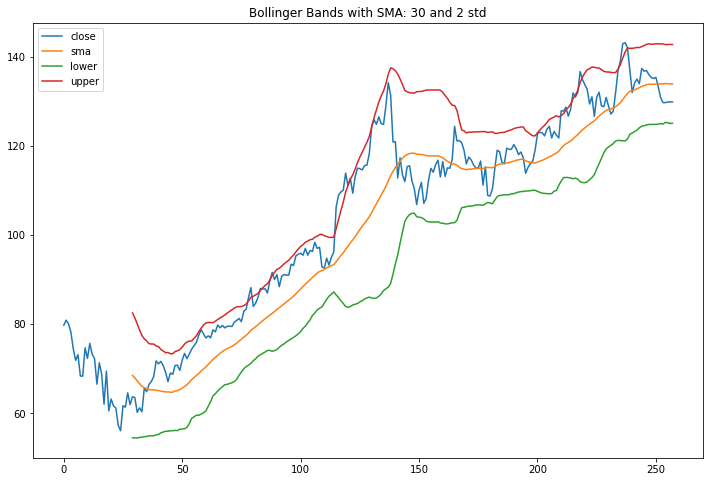

In [12]:
data[['close', 'sma', 'lower', 'upper']] \
    .plot(figsize=(12, 8), title=f'Bollinger Bands with SMA: {SMA} and {DEV} std');

In [13]:
data['distance'] = data['close'] - data['sma']

In [14]:
data['position'] = np.where(data['close'] < data['lower'], 1, np.nan)

In [15]:
data['position'] = np.where(data['close'] > data['upper'], -1, data['position'])

In [16]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0,
                            0, data['position'])

In [17]:
data['position'] = data['position'].ffill().fillna(0)

In [18]:
data['position'].value_counts()

 0.0    169
-1.0     89
Name: position, dtype: int64

In [19]:
data.tail(10)

,time,open,high,low,close,volume,sma,lower,upper,distance,position
248,2021-02-10 07:00:00,136.51,137.34,134.41,135.39,15590571,133.817000,124.818347,142.815653,1.573000,0.0
249,2021-02-11 07:00:00,135.39,136.36,133.79,135.13,13551807,133.825667,124.822318,142.829016,1.304333,0.0
250,2021-02-12 07:00:00,134.80,135.50,133.71,135.37,14199593,133.880667,124.859846,142.901487,1.489333,0.0
251,2021-02-16 07:00:00,136.71,136.72,132.82,133.19,18658772,133.897333,124.883771,142.910895,-0.707333,0.0
252,2021-02-17 07:00:00,133.66,133.66,129.50,130.84,21042119,133.945000,125.014895,142.875105,-3.105000,0.0
253,2021-02-18 07:00:00,130.80,131.38,127.43,129.71,20428185,133.901667,124.900297,142.903037,-4.191667,0.0
254,2021-02-18 07:00:00,130.80,131.38,127.43,129.71,20428185,134.005333,125.284671,142.725996,-4.295333,0.0
255,2021-02-19 07:00:00,129.95,130.78,128.50,129.87,21624018,133.970333,125.190206,142.750461,-4.100333,0.0
256,2021-02-19 07:00:00,129.95,130.78,128.50,129.87,21624018,133.897667,125.016274,142.779059,-4.027667,0.0
257,2021-02-19 07:00:00,129.95,130.78,128.50,129.87,21624018,133.927333,125.108185,142.746482,-4.057333,0.0
